In [118]:
pwd

'C:\\Users\\HP\\Desktop\\Data Science\\Project'

In [119]:
cd/Users/HP/Desktop/Data Science/Project

C:\Users\HP\Desktop\Data Science\Project


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [121]:
companies = pd.read_csv("companies.csv")
# The indeependant variable take all rows of data but not the last column (Which is supposed to be Y(Dependant variable))
X = companies.iloc[:,:-1].values
#Y = all rows but only the last column
y = companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


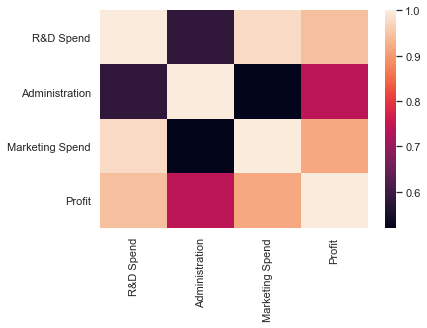

In [122]:
sns.heatmap(companies.corr())

In [123]:
companies.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [124]:
#Checking whether we have null values 
#Here no column has null values aotherwise you had to put dummy values
companies.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [125]:
# Categorical Encoding
# We have to change the column "State" into dummiees by using column transformer
#OnehOtEncoder has the ability to fit and transform the categorical column- the abilllity to give it an ineger value
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [126]:
ohe.fit_transform(companies[['State']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [127]:
ohe.categories_
#Look above- 001-Ny / 100-California - / 010-Florida -Checks using the companies.head

[array(['California', 'Florida', 'New York'], dtype=object)]

In [128]:
#Dummification is just a preprocess now we need to Column transform
#from sklearn.compose import make_column_transformer
#Now you use One hot Encoder on the column State in the next line

In [129]:
# Making it into a numpy inorder to take care of dummy trap as well as smooth movememnt of column transfromation function
companies = companies.iloc[:,:].values

In [130]:
companies

array([[165349.2, 136897.8, 471784.1, 'New York', 192261.83],
       [162597.7, 151377.59, 443898.53, 'California', 191792.06],
       [153441.51, 101145.55, 407934.54, 'Florida', 191050.39],
       ...,
       [100275.47, 241926.31, 227142.82, 'California', 413956.48],
       [128456.23, 321652.14, 281692.32, 'California', 333962.19],
       [161181.72, 270939.86, 295442.17, 'New York', 476485.43]],
      dtype=object)

In [131]:
# We need to transorm the column state into numerical value 
#a_ Using label encoder we give values to each state 2,1,0
#b) These 2,0,1 values are not allright as ML can unecesary comapre and say 2>1>0 and make unecesaary relation
# c) So using One hot encoder and column transform function we give it integer values

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
#Lets's say a new variable country
country=LabelEncoder()

In [134]:
#You need to transform the column 3 State
companies[:,3]=country.fit_transform(companies[:,3])

In [135]:
# Here we can see 2,0,1 name of state
companies

array([[165349.2, 136897.8, 471784.1, 2, 192261.83],
       [162597.7, 151377.59, 443898.53, 0, 191792.06],
       [153441.51, 101145.55, 407934.54, 1, 191050.39],
       ...,
       [100275.47, 241926.31, 227142.82, 0, 413956.48],
       [128456.23, 321652.14, 281692.32, 0, 333962.19],
       [161181.72, 270939.86, 295442.17, 2, 476485.43]], dtype=object)

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [137]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[3])],remainder='passthrough')

In [138]:
X=ct.fit_transform(companies)
X

array([[0.0, 0.0, 1.0, ..., 136897.8, 471784.1, 192261.83],
       [1.0, 0.0, 0.0, ..., 151377.59, 443898.53, 191792.06],
       [0.0, 1.0, 0.0, ..., 101145.55, 407934.54, 191050.39],
       ...,
       [1.0, 0.0, 0.0, ..., 241926.31, 227142.82, 413956.48],
       [1.0, 0.0, 0.0, ..., 321652.14, 281692.32, 333962.19],
       [0.0, 0.0, 1.0, ..., 270939.86, 295442.17, 476485.43]],
      dtype=object)

In [139]:
#Removing Dummy trap by taking the first column values
X=X[:,1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1, 192261.83],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53, 191792.06],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54, 191050.39],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82, 413956.48],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32, 333962.19],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17, 476485.43]],
      dtype=object)

In [140]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5
0,0,1,165349,136898,471784,192262
1,0,0,162598,151378,443899,191792
2,1,0,153442,101146,407935,191050
3,0,1,144372,118672,383200,182902
4,1,0,142107,91391.8,366168,166188
...,...,...,...,...,...,...
995,0,0,54135,118452,173233,95280
996,0,0,134970,130390,329204,164337
997,0,0,100275,241926,227143,413956
998,0,0,128456,321652,281692,333962


In [141]:
#Splitting the Dataset into the Trainingset and Test set @ 20% RATIO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [142]:
# Fitting multiple Linear Regression model to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
#Predicting the test set results has 200 observations as ( 20% of 1000 )
y_pred = regressor.predict(X_test)
y_pred

array([ 89012.02672,  87654.55773,  94093.35179, 175396.2616 ,
        83356.61784, 110395.794  , 105008.31   ,  90687.2921 ,
       164180.2702 ,  53483.75718,  66273.3533 , 150393.716  ,
       125971.2343 ,  58694.93455, 176344.525  ,  75297.23305,
       118219.3944 , 163462.6654 , 132602.65   , 181574.4968 ,
        97483.56   ,  84909.71956, 180684.3252 ,  83391.64379,
       104159.467  , 100404.0021 ,  64926.08   ,  56944.49153,
        68210.88613, 191792.06   , 120738.6997 , 110848.5685 ,
       101352.2656 , 137842.4672 ,  63306.39937, 107994.381  ,
       185502.5285 , 171176.9165 , 174364.2776 , 117645.3106 ,
        96616.9285 , 164336.6055 , 106865.8621 ,  50468.96294,
       116492.8715 ,  57992.70704, 158208.7735 ,  78689.62408,
       159514.1307 , 131051.7051 , 184555.1194 , 174329.2516 ,
        92949.45565,  78308.61013, 180257.1795 ,  84583.38025,
       142762.3312 , 170174.8327 ,  84305.73556, 105154.7165 ,
       141527.0259 ,  52609.81711, 140832.487  , 138872

In [144]:
# Calculating the Coefficients
print(regressor.coef_)

[-4.17885238e-12 -6.49962810e-12 -4.09616402e-16 -5.24630788e-16
 -1.33364719e-16  1.00000000e+00]


In [145]:
#Calculating the intercept
print(regressor.intercept_)

1.0186340659856796e-10


In [146]:
### Calculating the R squared value - y_test is the 200 values we were given and y_pred were the values we calculated using 
#Using linear regression
# i.e Using X_test we predicted y_pred and then checked r^2 by comparing y^test and y_pred
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

### Hence we sucessfuly trained our model with certain predictors and estimated the profits of companies using
##Linear Regression - Wher both X an Y were continuous

### Above we created a mosel train/test - 0.8/0.2
### Then we created a model using 800 data and actually found B0 and B1
### Now with 200 X_test we predicted the value of those 200 Y value ,using above Bo and B1 (Y pred.)
### Now we compare the value of Y pred. and Y_test
### Here we create a model where we can predict Profit(Y) when any value of X is given

In [147]:
### Logistic regression
#It is used as a classifying problem
# It's Y is discerete (eg. Car break down say Yes/No)
#Sigmoid curve

In [148]:
# Here we are training our model to recognize digits which are in the form of images

In [149]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [150]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


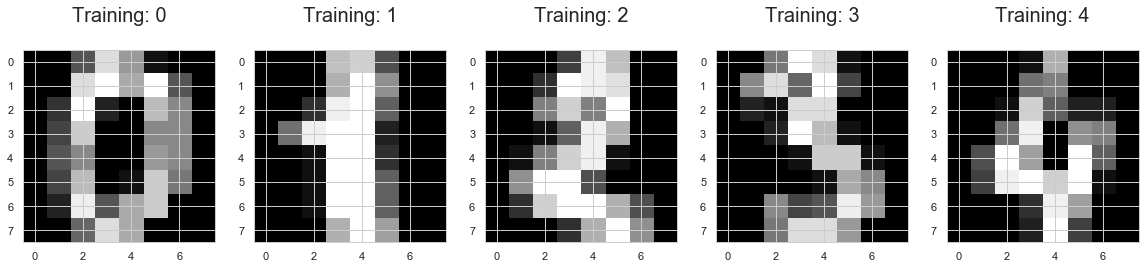

In [151]:
# After importing certain libraries we are actually crating certain figures using matplotlib library ,its an 8#8 pixel image
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [152]:
# y_train is a labelled data where the final value whether the number is 0,1,2,3 is labelled (i.e. supervised)
# splitig the data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [153]:
print(x_train.shape)

(1383, 64)


In [154]:
print(y_train.shape)

(1383,)


In [155]:
print(x_test.shape)

(414, 64)


In [156]:
print(y_test.shape)

(414,)


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
# return a numpy array
# Predict for One Observation(image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [160]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [161]:
predictions = logisticRegr.predict(x_test)

In [162]:
score = logisticRegr.score(x_test,y_test)
print(score)

0.9516908212560387


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [164]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


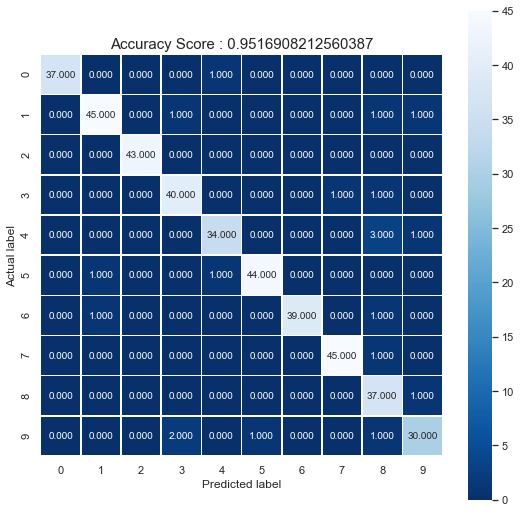

In [165]:
# Creating a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size =15);

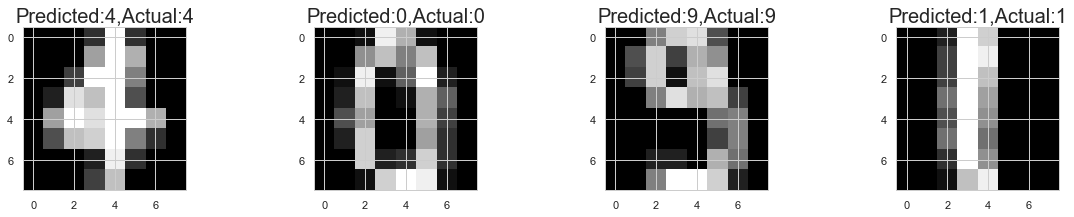

In [166]:
# Comparing the actual and predicted score
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)

In [167]:
# K_Means clustering - Unsupervised learning - whwere we do not label anything # Runs & Wickets example in cricket

In [168]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() #for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16,9]
plt.style.use('ggplot')

data = pd.read_csv('movie_metadata.csv')
print(data.shape)
print(data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David M

In [169]:
newdata=data.loc[:,['director_facebook_likes','num_critic_for_reviews']]
newdata

,director_facebook_likes,num_critic_for_reviews
0,0.0,723.0
1,563.0,302.0
2,0.0,602.0
3,22000.0,813.0
4,131.0,NaN
...,...,...
5038,2.0,1.0
5039,NaN,43.0
5040,0.0,13.0
5041,0.0,14.0


In [170]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [171]:
from sklearn.cluster import KMeans

In [172]:
#Filling the blank places with 0
newdata.fillna(0,inplace=True)

In [173]:
newdata

,director_facebook_likes,num_critic_for_reviews
0,0.0,723.0
1,563.0,302.0
2,0.0,602.0
3,22000.0,813.0
4,131.0,0.0
...,...,...
5038,2.0,1.0
5039,0.0,43.0
5040,0.0,13.0
5041,0.0,14.0


In [174]:
kmeans = KMeans(n_clusters=4)

In [175]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [176]:
kmeans.cluster_centers_
#array of 4 clusters

array([[  151.30995475,   135.33648704],
       [12485.98130841,   203.26168224],
       [21450.        ,   399.85      ],
       [16481.48148148,   226.62962963]])

In [177]:
# print the labels of the clusters
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [178]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4862, 1: 107, 2: 20, 3: 54}


C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


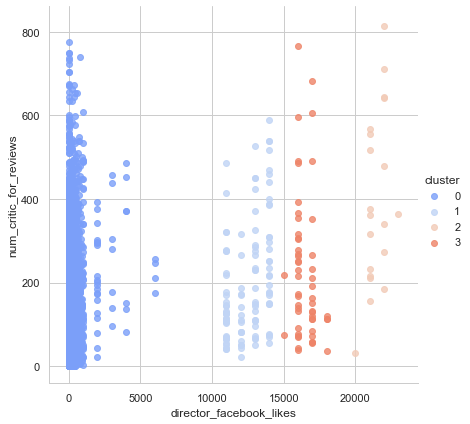

In [179]:
# Plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes','num_critic_for_reviews',data=newdata,hue='cluster',
          palette='coolwarm',size=6,aspect=1,fit_reg=False)

### So above we can see that directors with fewer facebook likes got more reviews

In [180]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [181]:
## We also check the amount of required clusters to keep
#kmeans.inertia actually speaks about the distance among values in each clusters - THat is how spread the cluster actually is
kmeans.inertia_

820449536.6649767

In [182]:
kmeans.score(newdata)

-820449536.6649776

In [183]:
SSE = []

In [184]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1,n_clusters = cluster)
    kmeans.fit(newdata)
    SSE.append(kmeans.inertia_)

In [185]:
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})

In [186]:
frame.head()

,Cluster,SSE
0,1,3.920616e+10
1,2,2.428053e+09
2,3,1.177157e+09
3,4,8.204495e+08
4,5,5.149673e+08


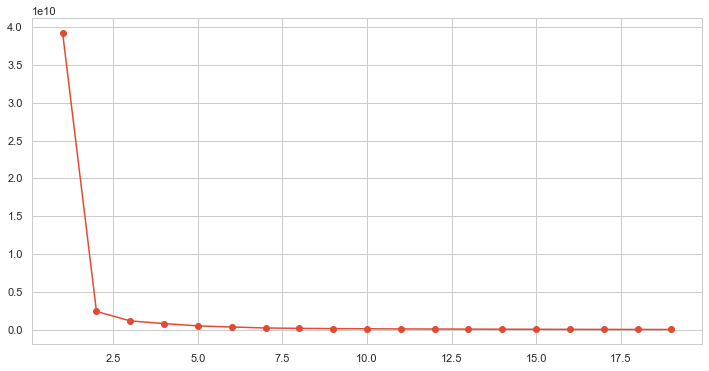

In [187]:
# SSE is the different inertia values , inorder to find the right number of clusters
#We need to find the optimal cluster value by the elbow curve
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker="o")

In [188]:
# Since k_means use distance metric and so we transform/scale our values with mean=0 and S.D. =1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdata_scaled = scaler.fit_transform(newdata)

In [189]:
pd.DataFrame(newdata_scaled).describe()

,0,1,2
count,5.043000e+03,5.043000e+03,5.043000e+03
mean,-5.369545e-16,-7.710799e-16,-4.837131e-15
std,1.000099e+00,1.000099e+00,1.000099e+00
min,-2.413673e-01,-1.139796e+00,-1.701387e-01
25%,-2.392133e-01,-7.456421e-01,-1.701387e-01
50%,-2.252127e-01,-2.447388e-01,-1.701387e-01
75%,-1.735182e-01,4.532413e-01,-1.701387e-01
max,8.015395e+00,5.536179e+00,8.160048e+00


In [190]:
SSE_scaled = []

In [191]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1,n_clusters = cluster)
    kmeans.fit(newdata_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

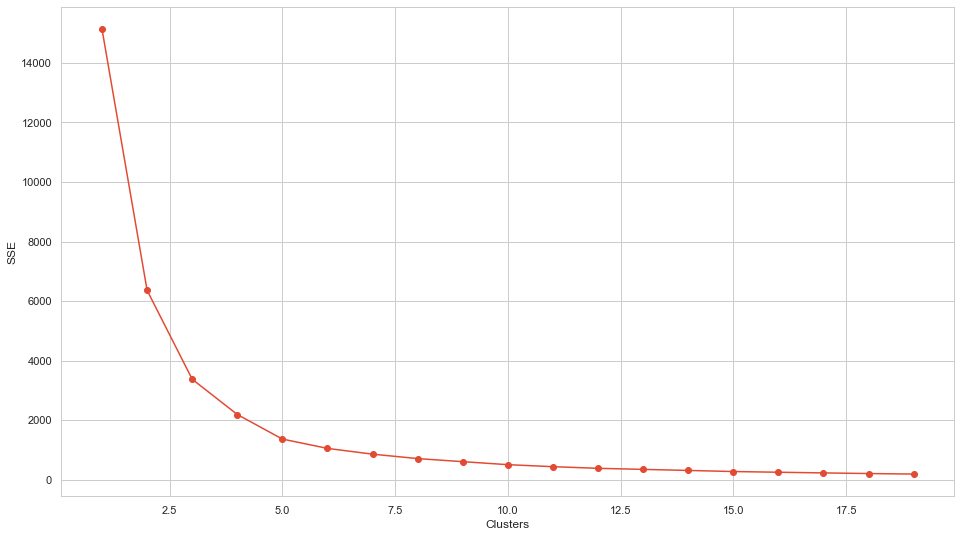

In [192]:
frame_scaled = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'],frame_scaled['SSE'],marker="o")
plt.xlabel("Clusters")
plt.ylabel("SSE")

### So here we see about 4-5 clusters seem appropriate
# This elbow curve concept should be done before to find the number of clusters and then perform the scatterplot

### Decision Tree can handle both numerical and categoricla data
- Non linear parameters don't effect its performance

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
balance_data=pd.read_csv("loan.csv")

In [194]:
print("Dataset Length:: ", len(balance_data))
print("Dataset Shape:: ", balance_data.shape)

Dataset Length::  1000
Dataset Shape::  (1000, 6)


In [195]:
balance_data.head()

,Initial payment,Last payment,Credit Score,House Number,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [196]:
#Seperating the target value
X = balance_data.values[:,0:4]
Y = balance_data.values[:,5]
# splitting the datset into Test and Train
X_train , X_test, y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
#Function to perform training with Entropy
#setting up the decision tree classifier for x_train and y_train
clf_entropy= DecisionTreeClassifier(criterion="entropy",random_state=100,
 max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [197]:
# Function to make predictions- predicting for X_tets- ther should be 300 answers in there
y_pred_en=clf_entropy.predict(X_test)
y_pred_en

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [198]:
#Checking Accuracy between the y_pred we calculated based on x_test and the y_test value itself 
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  93.66666666666667


### Random Forest

In [199]:
#Loading the library with iris datset
from sklearn.datasets import load_iris
# Loading scikit
from sklearn.ensemble import RandomForestClassifier
#Loading pandas
import pandas as pd
#Loading numpy
import numpy as np
#Setting random seed


In [200]:
# Creating an object called iris with iris data
iris = load_iris()
#print (iris)
# Creating a dataframe with four features variables
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [201]:
# Actually unecessary rather directly download iris
#Adding a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target,
iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [202]:
#Creating Test and Train Data
#df['is_train'] - means craeting a new column
#np.random.uniform - we r genearting a random no. (between 0 and 1) and we are doing it for each of the row -(len(df))
# So each row gets a generated number
# <= .75 means we are using 75% of data to train and rest to test
df['is_train'] = np.random.uniform(0,1,len(df)) <= .75

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [203]:
# Creating dataframes with test rows  and training rows
train, test = df[df['is_train']==True],df[df['is_train']==False]

print('Number of observations in the training data:',len(train))
print('Number of observations in the test data :',len(test))

Number of observations in the training data: 112
Number of observations in the test data : 38


In [204]:
#Creating a list of the feature column's name
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [205]:
#Converting species name into digits
y = pd.factorize(train['species'])[0]

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [206]:
# Creating a random forest classifier (with n_jobs = 2variables)
clf = RandomForestClassifier(n_jobs=2,random_state=0)
#Training the classifier
# train with features of training data to prdict ABOVE y
clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [207]:
#Apply the trained Classifier to the test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [208]:
#Sub dividing the above command
# Checking the features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [209]:
#Features of the testing data
test[features]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
9,4.9,3.1,1.5,0.1
12,4.8,3.0,1.4,0.1
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
19,5.1,3.8,1.5,0.3
25,5.0,3.0,1.6,0.2
27,5.2,3.5,1.5,0.2
28,5.2,3.4,1.4,0.2
31,5.4,3.4,1.5,0.4


In [210]:
# Viewing the predicted probabilities of the first 10-20 observation
# Here first is sure event that its one of the 3 species 
# Second we aree 88% sure that it is species 2
clf.predict_proba(test[features])[10:20]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.97, 0.03],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.87, 0.13],
       [0.  , 1.  , 0.  ]])

In [211]:
# mapping names for the plants for each predicted plant class
preds= iris.target_names[clf.predict(test[features])]
# View he predicted species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [212]:
# Viwing the actual species for the first 5 observations
test['species'].head()

2     setosa
9     setosa
12    setosa
15    setosa
16    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [213]:
#Creating confusion matrix
pd.crosstab(test['species'],preds,rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,12,0,0
versicolor,0,13,1
virginica,0,0,12


### Above 11,11,14 are the right predictions i.e 36 rightly predicted
### while 1  of virginica wrongly predicted as versicolor
### model accuracy = 36/37

In [214]:
# How to predict if we are given random 4 features
preds= iris.target_names[clf.predict([[5.0,3.6,1.4,2.0],[5.0,3.6,3.4,4.5]])]
preds

array(['setosa', 'versicolor'], dtype='<U10')

### K - Nearest neighbour Algorithm
### it is a supervised  ML algorithm used for classification

In [215]:
## KNN- Predict whetehr a person has diabetes or not

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [217]:
dataset = pd.read_csv('diabetes.csv')
print(len(dataset))
dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
# Rplace zeroe's in column with none (AS skin thickness-0 means u r dead)
#then replace none with mean values


In [219]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [220]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [221]:
#Splitting the data
#:,0:8]  here column is (n-1)
X = dataset.iloc[:,0:8]
# y = [:,8] - we talk about column 8 only
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

In [222]:
X_test.shape

(154, 8)

In [223]:
# RULE OF THUMB - Any algorithm that computers distance or assumes normality , scale your features
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [224]:
# Choosing k value - its closest odd value to the sqr root
import math
math.sqrt(len(y_test))
# Since its an even number we take 11 as n

12.409673645990857

In [225]:
#Define the model : int-K-NM and p is the power of the parameter
Classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
Classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [226]:
# Predicting the test set results
y_pred = Classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [227]:
# Evaluation Model
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[94 13]
 [15 32]]


### Above matrix  y-axis is (Actual) and x-axis(Predicted)
### So 94 and 32 are diagonal elements where actual and predicted are right
### 15 and 32 are points where there are mistakes in actual and predicted

In [228]:
print(f1_score(y_test,y_pred))


0.6956521739130436


In [229]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


### Supervised  Vector Machine -svm- It is a supervised classification method that seperates data using hyperplanes
- It can be used both for classification and regression problems

In [230]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()
# Our objective is to find the Class - Whether cell is '2'- 'BENIGN' OR '4'-MALIGNANT

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [231]:
cell_df.shape
#cell_df.size
#cell_df.count()

(699, 11)

In [232]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [233]:
##*******************************************************************************************************************
cell_df['Class'] = pd.Categorical(cell_df['Class'])
#print (cell_df.dtypes)
#print (cell_df['Class'].cat.categories)
print (cell_df['Class'].unique())

[2, 4]
Categories (2, int64): [2, 4]


In [234]:
# DISTRIBUTION OF THE CLASSES - 
# beningn equals first 200 observations(rows) whivh are beningn
benign_df = cell_df[cell_df['Class']==2][0:200]
# same with malignant
#i.e- First 200 rows aahaving the aboce characteristic of 2,4 
malignant_df = cell_df[cell_df['Class']==4][0:200]


In [235]:
# If u need help
#help(benign_df.plot)

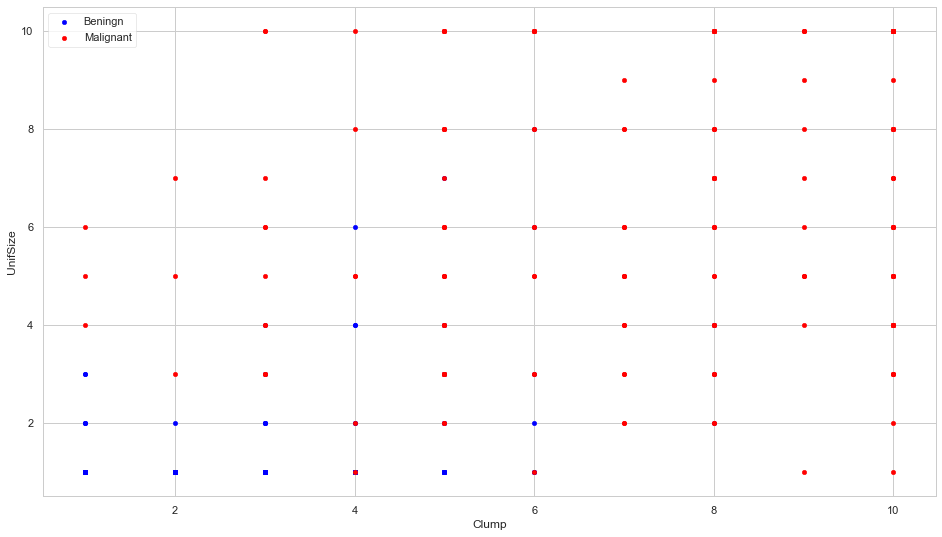

In [236]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]
axes= benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue', label='Beningn')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red', label='Malignant',ax=axes)


In [237]:
cell_df.dtypes
# Hence we need to convert BareNuc into string

ID                int64
Clump             int64
UnifSize          int64
UnifShape         int64
MargAdh           int64
SingEpiSize       int64
BareNuc          object
BlandChrom        int64
NormNucl          int64
Mit               int64
Class          category
dtype: object

In [238]:
# Converting it into int
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID                int64
Clump             int64
UnifSize          int64
UnifShape         int64
MargAdh           int64
SingEpiSize       int64
BareNuc           int32
BlandChrom        int64
NormNucl          int64
Mit               int64
Class          category
dtype: object

In [239]:
# Not including some columns
cell_df.columns

# Out of all 11 column we take 9 , so define a new df
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
# Definig X
X = np.asarray(feature_df)
y = np.asarray(cell_df['Class'])

X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [240]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [241]:
# Dividing the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape

(546, 9)

In [242]:
X_test.shape

(137, 9)

In [243]:
# Modelling - svc - Support vector classifier (Go and check its definition)
# Kernel is used to change the dimensions of a figure for better visualisation
#Kernel-can be 'linear','Ploynomial', 'Radialbasis' , 'sgmoid'
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
# Abobe classifier model is developed based on the X_train and y_train

y_predict = classifier.predict(X_test )
# the values which are not mentioned above , th system take the default value

In [244]:
# Evaluating results - Type2 benign and type 4 is malignant
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



### For type 2 - Precision is 100% while for type 4 - precision is 90%
https://www.youtube.com/watch?v=7sz4WpkUIIs

Precision (for type2 =1) = true positive case prediction/ [total(positive) predictions + False (positive cases) predictions]


# Check folder for later interpretations
Support - 47 caes of evil cancerous cell found
         -90 cases of less dangerous cancer cell found

### Naive Bayes Classifier Application

In [245]:
from sklearn.datasets import fetch_20newsgroups
data1 = fetch_20newsgroups()
data1.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [246]:
# Above we have 20 news categories
# Now we define all categoreis
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Training the data on these categories
train = fetch_20newsgroups(subset='train',categories=categories)
# Testing the data for these categories
test = fetch_20newsgroups(subset='test',categories=categories)

#Printing the training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [247]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [249]:
print(len(train.data))
##i.e. Training data has 11314 articles

11314


In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer
# What it does in the article it gives more weights to words like military , weapons rathen than to from whom etc
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Make a model by pipeline . get the words from TfidVectorizer and pump it into MultinomialNB

# Creating a model based on Multi nomial Naive Bayes
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

# Training the model with training data
model.fit(train.data, train.target)
#weighted words of tfid of train data is MAPPED to the train target
# Creating label for the test data

labels = model.predict(test.data)

Text(322.23312500000003, 0.5, 'predicted label')

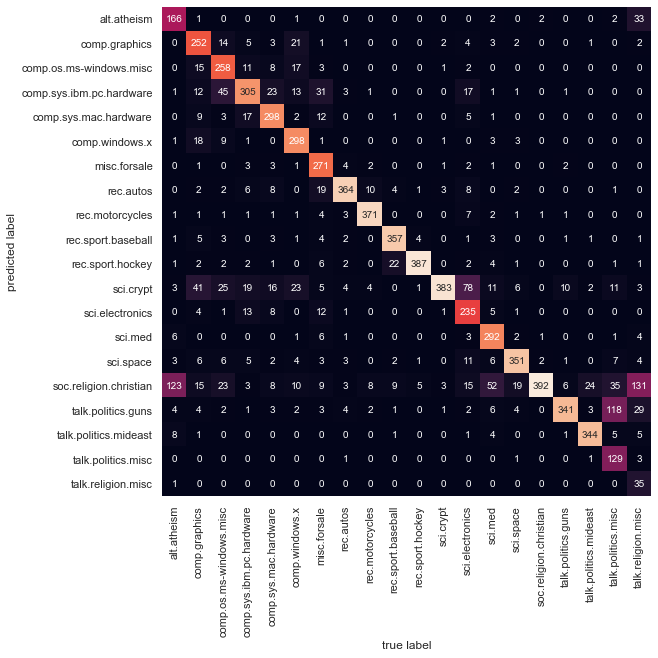

In [251]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix(mat) with labels -(Above where we predicted the test data )& test.target = Actual target
mat = confusion_matrix(test.target, labels)
# Creating a heatmap with above mat , then annotation and format related command
# x-tick and t-tick refers to the names on the x and y -axis which are required to be same
sns.heatmap(mat.T,square=True,annot=True,fmt='d', cbar=False
           , xticklabels=train.target_names
           , yticklabels=train.target_names)
# Plotting haetmap of confusion matrix and labeling the x-axis and y-axis
plt.xlabel('true label')
plt.ylabel('predicted label')

In [252]:
# Predicting category on new data based on training model
# we are defining a f(x) which would predict our categories which we earlier defined
#through a string's' , and based on our trainig data , model refers to the pipeline we made earlier
def predict_category(s,train=train, model=model):
    pred= model.predict([s])
    return train.target_names[pred[0]]
#pred will predict the string(s) through the mo=odel and return the train.target_names 

In [253]:
predict_category('Leicestre will reach top 4')

'rec.autos'

In [254]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [255]:
predict_category(' bollywood')

'rec.sport.hockey'

In [256]:
predict_category( "President of india")

'talk.politics.misc'

In [257]:
predict_category(" i will race around my merc")

'sci.space'

### Using Movie review data for sentiment analysis

In [265]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [267]:
df1 = pd.read_csv("movie_data.csv")
df1.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
